## Repaso a pandas en series temporales

In [1]:
# Librería para gestión COMPLETA de nulos
# https://github.com/ResidentMario/missingno

In [2]:
"""
    CÓMO CARGAR UNA SERIE TEMPORAL.
"""

import pandas as pd
# path = '/home/jtauste/PycharmProjects/Apuntes/time_series/data/raw/AirPassengers.csv'
path = '/home/javi/PycharmProjects/Apuntes/time_series/data/raw/AirPassengers.csv'

# squeeze=True Solo tenemos una columna y no queremos un dataframe, queremos una serie temporal
df = pd.read_csv(path, 
                 header=0, 
                 parse_dates=True, # True parse index. [[1,3]] combiana cols 1y3 en datetime. {‘date’:[1,3]} creando col 'date'
                 infer_datetime_format=True, # Infiere el 1º y los hace todos igual (10xfaster)
                 index_col=0, 
                 na_values=['NULL', 'NaN', 'n/a', 'nan', 'null']) # Qué valores consideramos como Nan
                 #, squeeze=True) # Solo hay una columna, no queremos un dataframe si no una serie temporal pura
display(df.describe())
display(df.info())
print(df.head())

#Passengers
count   144.000000
mean    280.298611
std     119.966317
min     104.000000
25%     180.000000
50%     265.500000
75%     360.500000
max     622.000000

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   #Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


None

            #Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121


In [3]:
"""
    CÓMO SE PROCESAN LAS FECHAS.
        
    Pandas reinterpreta muy bien las fechas a partir de objetos como strings,
    ('09/11/2017', '2017-09-11', '05SEP2014:00:00:00.000', '20190902', '02-Sep-2019', "4th of July, 2015" ...)
    long_ints (miliseconds desde una fecha concreta). Para ayudarle a ese trabajo 
    se suele usar to_datetime(format="%d/%m-%Y") que indica como debería leer el 
    string para encontrar y convertir a su propio objeto datetime.
    
    Esta función no cambia la forma en la que se muestra la columna de tipo datetime,
    solo su representación interna en ese objeto. Para cambiar la forma en la que se
    muestra debe convertirse a string (perdinedo los "poderes" del tipo datetime)
    (o sobreescribiendo la clase __repr__ del objeto datetime)
    
    Si existen estos formatos complejos en un .csv la función read_csv no tiene 
    format="" y parse_dates=True no tendría efecto, lo ignoraría como imposible.
"""

from datetime import datetime # Python datetime type
dates = pd.to_datetime([datetime(2015, 7, 3), '4th of July, 2015', '2015-Jul-6', 
                        '07-07-2015', '20150708', '09/11/2017', '2017-09-11', 
                        '20190902', '02-Sep-2019'])
print(dates) # Conversión desde strings de muchas formas


# Ejemplo conversión problemática:
df2 = pd.DataFrame(['05SEP2014:00:00:00.000'],columns=['Mycol'])
print(df2['Mycol'])  # Detectado como un object(str)

# df2['Mycol'] = pd.to_datetime(df2['Mycol'])
## >> Unknown string format: 05SEP2014:00:00:00.000

df2['Mycol'] = pd.to_datetime(df2['Mycol'], format="%d%b%Y:%H:%M:%S.%f")
print(df2['Mycol']) # Detectadp como datetime

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08', '2017-09-11', '2017-09-11', '2019-09-02',
               '2019-09-02'],
              dtype='datetime64[ns]', freq=None)
0    05SEP2014:00:00:00.000
Name: Mycol, dtype: object
0   2014-09-05
Name: Mycol, dtype: datetime64[ns]


In [4]:
"""
    QUÉ OBJETO/S SE USAN PARA LAS S.T.

    Para Series temporales Python tiene el objeto Datetime con muchas funciones
    y expresividad pero es lento. Numpy tiene Datetime64 que es mucho más rápido
    pero con menos funcionalidades. Pandas, en cambio, usa su objeto Timestamp que
    auna los beneficios de los dos anteriores, con las funcionalidades casi iguales
    a las de Datetime y la velocidad de Datetime64.
    
    Se suele usar pd.to_datetime(), o pd.DatetimeIndex(), para pasar de string a 
    Timestamp. Y se suele usar dt.strftime() para pasar de Timestamp a string. 
"""    

print(df.loc['1949-02-01':'1949-08-01'].index)  # Con datetimes se pueden indexar slices

df.index = pd.to_datetime(df.index).strftime('%d-%m-%Y') 
# https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior
# O también lo encuentras como (menos eficiente): 
# import datetime as dt
# df2['Mycol'] = df2['Mycol'].apply(lambda x: dt.datetime.strptime(x,'%d%b%Y:%H:%M:%S.%f'))
print(df.index)  # Ahora son strings con un formato "al gusto"

# print(df.loc['1949-02':'1949-03'].index)  # Con strings no se pueden indexar slices

df.index = pd.to_datetime(df.index, dayfirst=True)
df.index = pd.to_datetime(list(df.index), format="%d/%m-%Y")
# Este format="" será ignorado 
print(df.index)  # Ahora son datetimes

# Se puede extraer de datetime sus componentes fácilmente
# Los objetos datetipe son de clase timestamp
# 
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Timestamp.html
df['Year'] = df.index.year
df['Month'] = df.index.month
df['day'] = df.index.day
df['leap_year'] = df.index.is_leap_year
df['quarter_year'] = df.index.quarter
df['weekday'] = df.index.weekday
df['Weekday Name'] = df.index.day_name()
display(df.head(2))

print() # ·····················································································SEPARACIÓN
#Curiosidad DatetimeIndex ~= to_datetime

dates = ['2014-07-04', '2014-08-04',
         '2015-07-04', '2015-08-04']
index = pd.DatetimeIndex( dates ) 
# index = pd.to_datetime( dates ) # Es lo mismo

data = pd.Series([0, 1, 2, 3], index=index)
print( data.index )

DatetimeIndex(['1949-02-01', '1949-03-01', '1949-04-01', '1949-05-01',
               '1949-06-01', '1949-07-01', '1949-08-01'],
              dtype='datetime64[ns]', name='Month', freq=None)
Index(['01-01-1949', '01-02-1949', '01-03-1949', '01-04-1949', '01-05-1949',
       '01-06-1949', '01-07-1949', '01-08-1949', '01-09-1949', '01-10-1949',
       ...
       '01-03-1960', '01-04-1960', '01-05-1960', '01-06-1960', '01-07-1960',
       '01-08-1960', '01-09-1960', '01-10-1960', '01-11-1960', '01-12-1960'],
      dtype='object', name='Month', length=144)
DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', length=144, 

#Passengers  Year  Month  day  leap_year  quarter_year  weekday  \
1949-01-01          112  1949      1    1      False             1        5   
1949-02-01          118  1949      2    1      False             1        1   

           Weekday Name  
1949-01-01     Saturday  
1949-02-01      Tuesday


DatetimeIndex(['2014-07-04', '2014-08-04', '2015-07-04', '2015-08-04'], dtype='datetime64[ns]', freq=None)


In [5]:
"""
    QUÉ TIPO/S DE TEMPORALIDAD SE PUEDEN GESTIONAR.

    Pandas tiene 2 clases más a parte de Timestamp para gestionar fechas:
       *Timestamp: reemplazo de Datetime de Python con la velocidad de 
        np.datetime. Su estructura índice es DatetimeIndex
        t:--------x--------
        
       *Period: Intérvalo de tiempos Timestamp con frecuencia fija.
        Su estructura índice es PeriodIndex
        t:--x---x---x---x--
       
       *Timedelta: Duraciones de tiempo. Suelen ser desde un Timestamp 
        incial. Su estructura índice es TimedeltaIndex.
        t:--[x----------]--
       
    
    dt es una propiedad de Pandas Series que permite acceder a la fecha
    independientemente del tipo objeto fecha que contenga (Timestamp, TimeDelta, Period)
    Timestamp.dt.day or Period.dt.day or TimeDelta.dt.day
    # https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.time.html Ctrl+F "Series.dt"
"""


# Timestamp
dates = pd.to_datetime(['4th of July, 2015', '2016-Jul-6', '07-07-2015', '20150708'])
print( dates ) 

# Period
print( dates.to_period('m') )

# Timedelta
print(  dates - dates[0]  )

print() # ·····················································································SEPARACIÓN

p = pd.Period('2017-06-13')
test = pd.Timestamp('2017-06-13 22:11')
print( p.start_time < test < p.end_time )

# La razón de usar unas clases u otras es por la necesidad de usar las propiedades de 
# unas u otra en el código. P.e.: Timestamp no tiene .start_time

print() # ·····················································································SEPARACIÓN

print(  pd.date_range('2015-07-03', '2015-07-10')  ) 
print(  pd.date_range('2005-07-03', periods=8)  )   
print(  pd.date_range('2005-07-03', periods=8, freq='H')  ) # freq default 'D'

print(  pd.period_range('2015-07', periods=8, freq='M')  )
print(  pd.timedelta_range(0, periods=10, freq='H')  )

print(  pd.timedelta_range(0, periods=9, freq="2H30T")  ) # freq puedes convinar sus códigos


# Códigos de periodos
# https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html#Frequencies-and-Offsets


DatetimeIndex(['2015-07-04', '2016-07-06', '2015-07-07', '2015-07-08'], dtype='datetime64[ns]', freq=None)
PeriodIndex(['2015-07', '2016-07', '2015-07', '2015-07'], dtype='period[M]', freq='M')
TimedeltaIndex(['0 days', '368 days', '3 days', '4 days'], dtype='timedelta64[ns]', freq=None)

True

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')
DatetimeIndex(['2005-07-03', '2005-07-04', '2005-07-05', '2005-07-06',
               '2005-07-07', '2005-07-08', '2005-07-09', '2005-07-10'],
              dtype='datetime64[ns]', freq='D')
DatetimeIndex(['2005-07-03 00:00:00', '2005-07-03 01:00:00',
               '2005-07-03 02:00:00', '2005-07-03 03:00:00',
               '2005-07-03 04:00:00', '2005-07-03 05:00:00',
               '2005-07-03 06:00:00', '2005-07-03 07:00:00'],
              dtype='datetime64[ns]', freq='H')
PeriodIndex(['2015-07', '2015

/home/javi/.local/lib/python3.6/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


Date
2004-08-19    49.982655
2004-08-20    53.952770
2004-08-23    54.495735
2004-08-24    52.239193
Name: Close, dtype: float64


Date
2004-12-31     75.617206
2005-12-30    138.360933
2006-12-29    204.824916
2007-12-31    268.369305
2008-12-31    231.558071
Freq: BA-DEC, Name: Close, dtype: float64

Date
2004-08-19    49.982655
2004-08-20    53.952770
2004-08-21    53.952770
2004-08-22    53.952770
2004-08-23    54.495735
Freq: D, Name: Close, dtype: float64
Date
2004-08-19    49.982655
2004-08-20    53.952770
2004-08-21    54.133759
2004-08-22    54.314747
2004-08-23    54.495735
Freq: D, Name: Close, dtype: float64
Date
2004-08-19    49.982655
2004-08-20    53.952770
2004-08-21    54.029379
2004-08-22    54.582650
2004-08-23    54.495735
Freq: D, Name: Close, dtype: float64


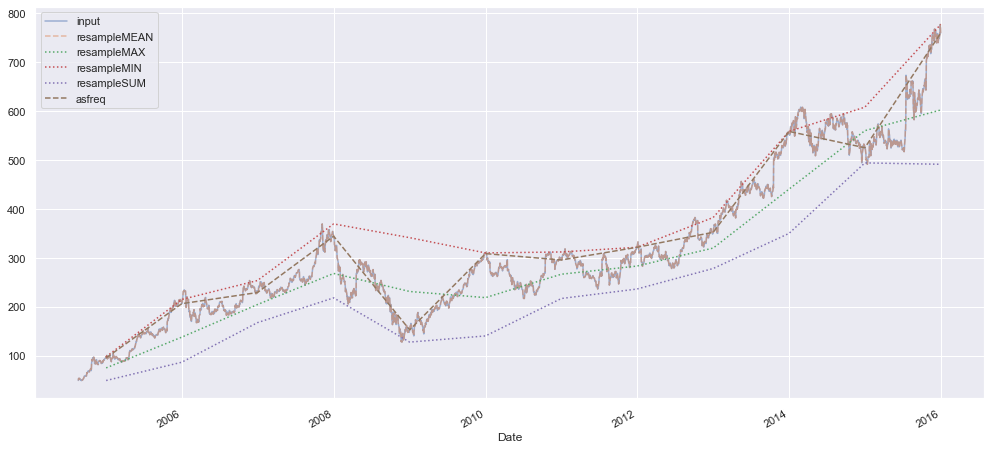

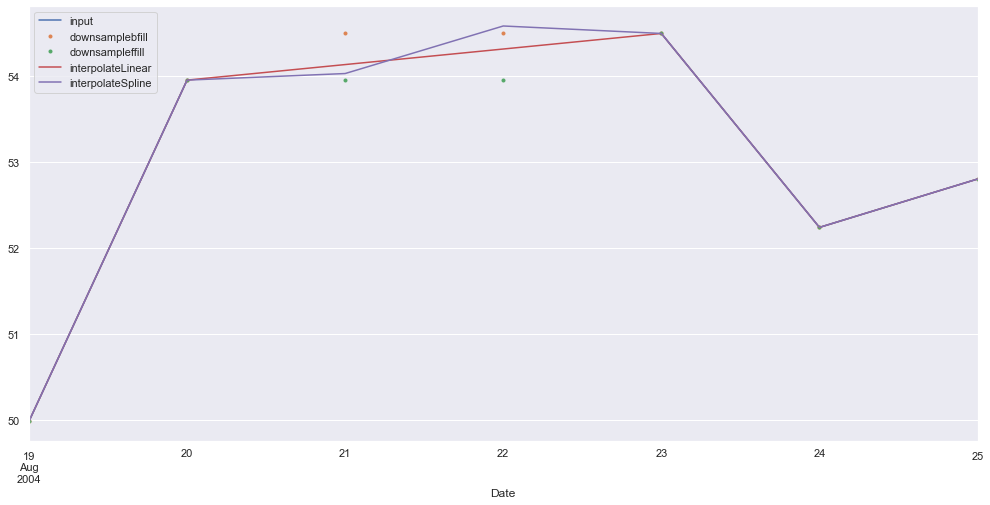

In [6]:
"""
    OVERSAMPLING & DOWNSAMPLING:
    
    Basicamente elegir que código de periodo usar.
    resample() agregación de los datos.
    asfreq() valor de los datos al final de la frecuencia elegida.
    interpolate() genera valores sintéticos intermedios.
    Son equivalentes pero resample tiene más opciones. 
    
    Los Business days no tienen fines de semana,
    Esos días tratados como días naturales aparecen vacíos
    Al igual que se puede imputar un valor concreto como pd.fillna()
    method='ffill' propaga el último valor hacia delante
    method='bfill' propaga el siguiente valor hacia atrás
    
    INTERPOLACIÓN Y CARGA DE UN DATASET CON UN date_parser CUSTOM
    https://machinelearningmastery.com/resample-interpolate-time-series-data-python/
"""

from pandas_datareader import data
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

google = data.DataReader('GOOG', start='2004', end='2016', data_source='yahoo')

goog = google['Close']
display( goog.head(4) )  # Mira, faltan días


print() # ·····················································································SEPARACIÓN
# Como rellenar el undersampling

# BA = Business year end
plt.figure(figsize=(17,8))
goog.plot(alpha=0.5, style='-')
goog.plot(alpha=0.5, style='--')
goog.resample('BA').mean().plot(style=':')  # Mean of the previous year
goog.resample('BA').max().plot(style=':')   # Max of the previous year
goog.resample('BA').min().plot(style=':')   # Min of the previous year
# goog.resample('BA').sum().plot(style=':')   # SUM of the previous year
goog.asfreq('BA').plot(style='--');         # Value at the end of the period (year in this case)
plt.legend(['input', 'resampleMEAN','resampleMAX', 'resampleMIN', 'resampleSUM', 'asfreq'], loc='upper left');
print(goog.resample('BA').mean().head())  # undersampling


print() # ·····················································································SEPARACIÓN
# Como rellenar el oversampling

goog = google['Close']
goog = goog['2004-08-18':'2004-8-25']
plt.figure(figsize=(17,8))
goog.asfreq('D').plot(style='-')
goog.asfreq('D', method='bfill').plot(style='.')
goog.asfreq('D', method='ffill').plot(style='.')
goog.asfreq('D').interpolate(method='linear', order=2).plot(style='-')
goog.asfreq('D').interpolate(method='spline', order=2).plot(style='-')  # Prueba a poner una 'h', queda feo
plt.legend(['input', 'downsamplebfill','downsampleffill', 
            'interpolateLinear', 'interpolateSpline'], loc='upper left');

print( goog.asfreq('D', method='ffill').head() )  # Oversampling. Aquí sí que están los días que faltan
print( goog.asfreq('D').interpolate(method='linear').head() )
print( goog.asfreq('D').interpolate(method='spline', order=2).head() )

A   B   C   D
2000-01-01 00:00:00  1  10  11  12
2000-01-01 12:00:00  2  20  22  24
2000-01-02 00:00:00  3  30  33  51
2000-01-02 12:00:00  4  40  44  36
2000-01-03 00:00:00  5  50  55   2

# ·····················································································SEPARACIÓN


A     B     C     D
2000-01-01 00:00:00  NaN   NaN   NaN   NaN
2000-01-01 12:00:00  NaN   NaN   NaN   NaN
2000-01-02 00:00:00  1.0  10.0  11.0  12.0
2000-01-02 12:00:00  2.0  20.0  22.0  24.0
2000-01-03 00:00:00  3.0  30.0  33.0  51.0

A     B     C     D
2000-01-01 00:00:00  3.0  30.0  33.0  51.0
2000-01-01 12:00:00  4.0  40.0  44.0  36.0
2000-01-02 00:00:00  5.0  50.0  55.0   2.0
2000-01-02 12:00:00  NaN   NaN   NaN   NaN
2000-01-03 00:00:00  NaN   NaN   NaN   NaN

A   B    C     D
2000-01-01 00:00:00 NaN NaN  1.0  10.0
2000-01-01 12:00:00 NaN NaN  2.0  20.0
2000-01-02 00:00:00 NaN NaN  3.0  30.0
2000-01-02 12:00:00 NaN NaN  4.0  40.0
2000-01-03 00:00:00 NaN NaN  5.0  50.0

A     B   C   D
2000-01-01 00:00:00  11.0  12.0 NaN NaN
2000-01-01 12:00:00  22.0  24.0 NaN NaN
2000-01-02 00:00:00  33.0  51.0 NaN NaN
2000-01-02 12:00:00  44.0  36.0 NaN NaN
2000-01-03 00:00:00  55.0   2.0 NaN NaN

# ·····················································································SEPARACIÓN


A   B   C   D
2000-01-02 00:00:00  1  10  11  12
2000-01-02 12:00:00  2  20  22  24
2000-01-03 00:00:00  3  30  33  51
2000-01-03 12:00:00  4  40  44  36
2000-01-04 00:00:00  5  50  55   2

A   B   C   D
1999-12-31 00:00:00  1  10  11  12
1999-12-31 12:00:00  2  20  22  24
2000-01-01 00:00:00  3  30  33  51
2000-01-01 12:00:00  4  40  44  36
2000-01-02 00:00:00  5  50  55   2

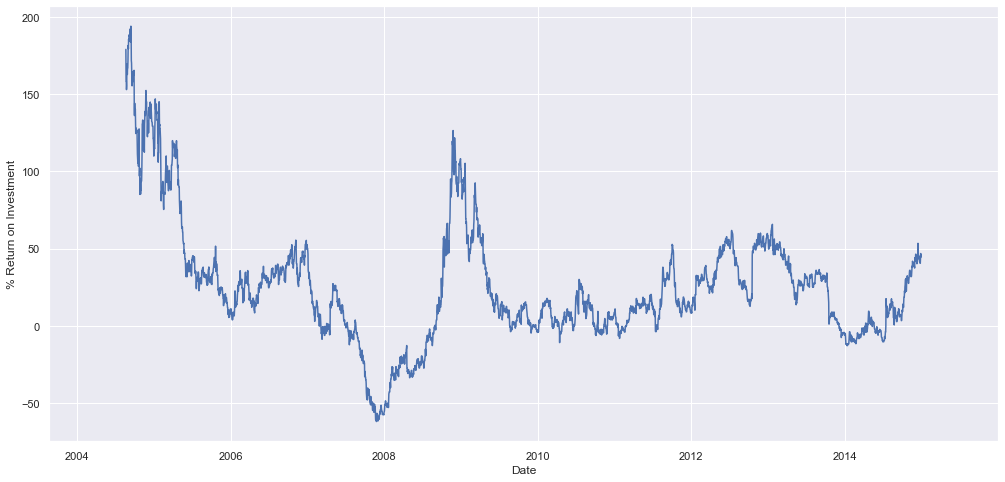

In [7]:
"""
    DESLIZAMIENTOS.

    shift(). shifts the data.
    tshift(). shifts the index.
    
    Ambos métodos tienen fill_value=OBJECT
"""

ind = pd.date_range('01 / 01 / 2000', periods = 5, freq ='12H') 
df = pd.DataFrame({"A":[1, 2, 3, 4, 5],  
                   "B":[10, 20, 30, 40, 50], 
                   "C":[11, 22, 33, 44, 55], 
                   "D":[12, 24, 51, 36, 2]},  
                    index = ind) 
display( df )

print('# ·····················································································SEPARACIÓN')
# Deslizamientos en los datos. shift

display( df.shift(2, axis = 0) )
display( df.shift(-2, axis = 0)  )
display( df.shift(2, axis = 1) )
display( df.shift(-2, axis = 1)  )


print('# ·····················································································SEPARACIÓN')
# Deslizamientos en el índice
# Como sabe como continuar las fechas no pone NaN

display( df.tshift(2) )
display( df.tshift(-2)  )


# Usado para conocer el retorno de la inversión de una acción
# Usarlo para conocer los días previos (-7, -30, -365)
plt.figure(figsize=(17,8))
google = data.DataReader('GOOG', start='2004', end='2016', data_source='yahoo')
google = google.asfreq('D', method='pad')
goog = google['Close']
ROI = 100 * (goog.tshift(-365) / goog - 1)
ROI.plot()
plt.ylabel('% Return on Investment');






# TODO: int(365) = .year?

Date
2004-08-19   NaN
2004-08-20   NaN
2004-08-21   NaN
2004-08-22   NaN
2004-08-23   NaN
              ..
2015-12-27   NaN
2015-12-28   NaN
2015-12-29   NaN
2015-12-30   NaN
2015-12-31   NaN
Freq: D, Name: Close, Length: 4152, dtype: float64

Date
2005-02-15            NaN
2005-02-16            NaN
2005-02-17     823.003059
2005-02-18     819.909485
2005-02-19     817.773291
                 ...     
2015-06-30    6508.710548
2015-07-01    6574.833549
2015-07-02    6627.537500
2015-07-03            NaN
2015-07-04            NaN
Freq: D, Name: Close, Length: 3792, dtype: float64

2017-01-01 12:00:00
12:00:00
6


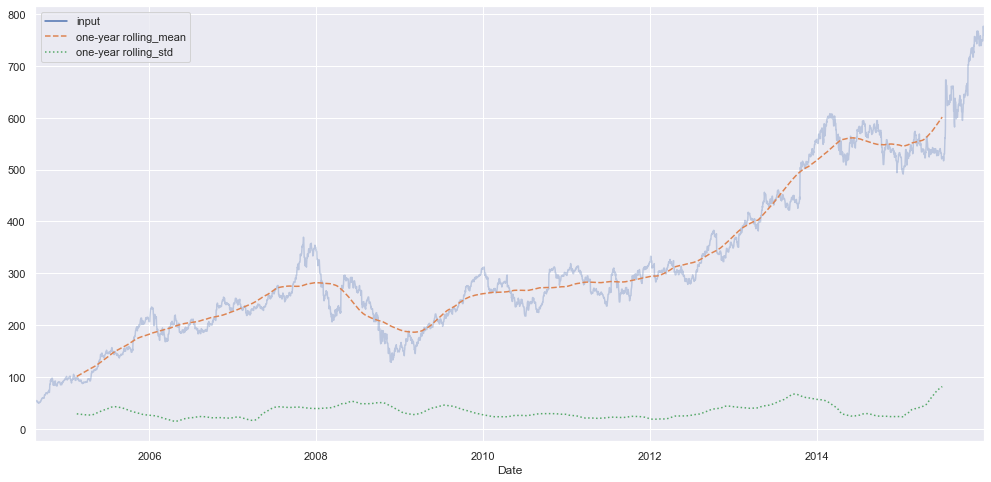

In [74]:
"""
    Sliding windows. rolling()

    Es como un .agg(), devuelve un objeto complejo
    que hay que agregar de alguna forma: 
    mean(): Compute mean of groups
    sum(): Compute sum of group values
    size(): Compute group sizes
    count(): Compute count of group
    std(): Standard deviation of groups
    var(): Compute variance of groups
    sem(): Standard error of the mean of groups
    describe(): Generates descriptive statistics
    first(): Compute first of group values
    last(): Compute last of group values
    nth() : Take nth value, or a subset if n is a list
    min(): Compute min of group values
    max(): Compute max of group values
    
    win_type es el tipo de "kernel" windows
    que usa para suavizar el ruido (como el gausiano)
"""

rolling = goog.rolling(365, center=True)

data = pd.DataFrame({'input': goog,
                     'one-year rolling_mean': rolling.mean(),
                     'one-year rolling_std': rolling.std()})


ax = data.plot(figsize=(17,8), style=['-', '--', ':'])
ax.lines[0].set_alpha(0.3)


display(rolling.var()) # 365/2=182.5 primeras muestras nulas 
display(rolling.var()[180:-180]) # 182.5 últimas muestras nulas


# .index.time   The time part of the Timestamps.
print( pd.Timestamp(2017, 1, 1, 12) )
print( pd.Timestamp(2017, 1, 1, 12).time() )
print( pd.Timestamp(2017, 1, 1, 12).dayofweek )


In [ ]:
# TODO:
# https://www.guru99.com/date-time-and-datetime-classes-in-python.html OTRO REPASO
# https://medium.com/jbennetcodes/dealing-with-datetimes-like-a-pro-in-pandas-b80d3d808a7f TIMEZONES y TRUQUITOS 


In [58]:
display( data.index[0:3].dayofweek )

Int64Index([3, 4, 5], dtype='int64', name='Date')

2017-01-01 12:00:00
12:00:00
